# 7.Analysis & Results

# 7.1 linear regression

In [1]:
install.packages("moments")
library(moments)

In [2]:
# I build functions. tgt is the abbreviations for target. pre is the the abbreviations for prediction.
# So, tgt is answer, and pre_y is the value predicted by regression  model
# RMSE is calculated by subtracting the predicted value from the actual value and multiplying the squared values and put square root.
# MAE  is gained by subtracting the predicted value from the actual value, making it absolute value, and averages it again.
# MAP is gained by subtracting predicted values from the actual values, deviding with the actual values, and averaging it with mutyplying 100


perf_eval_reg <- function(tgt_y, pre_y){
  
  # RMSE
  rmse <- sqrt(mean((tgt_y - pre_y)^2, na.rm=TRUE))
  # MAE
  mae <- mean(abs(tgt_y - pre_y),na.rm=TRUE)
  # MAPE
  mape <- 100*mean(abs((tgt_y - pre_y)/tgt_y),na.rm=TRUE)
  
  return(c(rmse, mae, mape))
  
}
  # Initialize  performance evaluation matrix
perf_mat <- matrix(0, nrow = 1, ncol = 3)


In [18]:
# we use RMSE, MAE, MAPE to know how accurately linear regression can make predictions.

rownames(perf_mat) <- c("car")
colnames(perf_mat) <- c("RMSE", "MAE", "MAPE")
perf_mat

,RMSE,MAE,MAPE
car,0,0,0


In [19]:
# load data csv file

setwd("C:/Users/Tommy/Desktop/CIS3920/carAnalysis")

In [20]:
car=read.csv("cars_new.csv")

In [21]:
# analyze the dimension of data

num_row0 <- nrow(car)
num_col0 <- ncol(car)
num_row0
num_col0

[1] 37679

[1] 16

This data has 37679 observations(row), and 16 variables(column)

In [22]:
# we suspect this original data has NA values, so remove those values

car1=na.omit(car)

In [23]:
num_row <- nrow(car1)
num_col <- ncol(car1)
num_row
num_col

[1] 37669

[1] 16

Removing NA values, it has 37669 observations only.

In [24]:
# analyze vectors and get the type of variables

summary(car1)

   price_usd      manufacturer_name   model_name        transmission  
 Min.   :    1   Volkswagen: 4243   Passat : 1423   automatic :12885  
 1st Qu.: 2250   Opel      : 2759   Astra  :  751   mechanical:24784  
 Median : 4900   BMW       : 2608   Golf   :  707                     
 Mean   : 6738   Ford      : 2566   A6     :  687                     
 3rd Qu.: 9000   Renault   : 2493   Mondeo :  637                     
 Max.   :50000   Audi      : 2468   Vectra :  565                     
                 (Other)   :20532   (Other):32899                     
     color      odometer_value    year_produced         engine_fuel   
 black  :7630   Min.   :      0   Min.   :1960   diesel       :12848  
 silver :6799   1st Qu.: 160000   1st Qu.:1998   electric     :    0  
 blue   :5684   Median : 250000   Median :2003   gas          : 1300  
 white  :4051   Mean   : 251114   Mean   :2003   gasoline     :23284  
 grey   :3705   3rd Qu.: 326000   3rd Qu.:2009   hybrid-diesel:    2  
 red  

In [25]:
sapply(car1,class)

price_usd manufacturer_name        model_name      transmission 
        "numeric"          "factor"          "factor"          "factor" 
            color    odometer_value     year_produced       engine_fuel 
         "factor"         "integer"         "integer"          "factor" 
   engine_has_gas       engine_type   engine_capacity         body_type 
        "logical"          "factor"         "numeric"          "factor" 
     has_warranty             state        drivetrain   is_exchangeable 
        "logical"          "factor"          "factor"         "logical"

As we see, the dependent variable(price_usd) is numeric value, but many other values have logical and factor type value. We convert these types of values to dummy variable for linear regression model.

In [26]:
# Convert logical to dummy variable
dummy_is_exchangeable <- as.numeric(car1$is_exchangeable)
dummy_has_warranty <- as.numeric(car1$has_warranty)
dummy_engine_has_gas<- as.numeric(car1$engine_has_gas )

In [ ]:
# Convert factor variavle into dummy variable
transmission_dummy=as.numeric(as.integer(car1$ transmission)-1)



In [28]:
dummy_Volkswagen <- rep(0,num_row)
dummy_Opel <- rep(0,num_row)
dummy_BMW <- rep(0,num_row)
dummy_Ford <- rep(0,num_row)
dummy_Renault <- rep(0,num_row)
dummy_Audi <- rep(0,num_row)
dummy_other_manufaturer <- rep(0,num_row)

In [29]:
Volkswagen_idx <- which(car1$manufacturer_name == "Volkswagen")
Opel_idx <- which(car1$manufacturer_name == "Opel")
BMW_idx <- which(car1$manufacturer_name == "BMW")
Ford_idx <- which(car1$manufacturer_name == "Ford")
Renault_idx <- which(car1$manufacturer_name == "Renault")
Audi_idx <- which(car1$manufacturer_name == "Audi")
other_manufacturer_idx <- which(car1$manufacturer_name == "(other)")

In [30]:
dummy_Volkswagen[Volkswagen_idx] <- 1
dummy_Opel[Opel_idx] <- 1
dummy_BMW[BMW_idx] <- 1
dummy_Ford[Ford_idx] <- 1
dummy_Renault[Renault_idx] <- 1
dummy_Audi[Audi_idx] <- 1
dummy_other_manufaturer[other_manufacturer_idx] <- 1

In [31]:
manufacturer_name <- data.frame(dummy_Volkswagen, dummy_Opel, dummy_BMW, dummy_Ford, dummy_Renault, dummy_Audi, dummy_other_manufaturer)
names(manufacturer_name) <- c("Volkswagen","Opel","BMW","Ford","Renault","Audi", "other_manufaturer")

In [32]:
dummy_black <- rep(0,num_row)
dummy_silver <- rep(0,num_row)
dummy_blue <- rep(0,num_row)
dummy_white <- rep(0,num_row)
dummy_grey <- rep(0,num_row)
dummy_red <- rep(0,num_row)
dummy_other_color <- rep(0,num_row)

In [33]:
black_idx <- which(car1$color == "black")
silver_idx <- which(car1$color == "silver")
blue_idx <- which(car1$color == "blue")
white_idx <- which(car1$color == "white")
grey_idx <- which(car1$color == "grey")
red_idx <- which(car1$color == "red")
other_color_idx <- which(car1$color == "other")

In [34]:
dummy_black[black_idx] <- 1
dummy_silver[silver_idx] <- 1
dummy_blue[blue_idx] <- 1
dummy_white[white_idx] <- 1
dummy_grey[grey_idx] <- 1
dummy_red[red_idx] <- 1
dummy_other_color[other_color_idx] <- 1

In [35]:
color <- data.frame(dummy_black, dummy_silver, dummy_blue, dummy_white, dummy_grey, dummy_red, dummy_other_color  )
names(color) <- c("black","silver","blue","white","grey","red", "other_color")

In [36]:
dummy_diesel  <- rep(0,num_row)
dummy_electric <- rep(0,num_row)
dummy_gas   <- rep(0,num_row)
dummy_gasoline <- rep(0,num_row)
dummy_hybrid_diesel <- rep(0,num_row)
dummy_hybrid_petrol <- rep(0,num_row)

In [37]:
diesel_idx <- which(car1$engine_fuel == "diesel")
electric_idx <- which(car1$engine_fuel   == "electric")
gas_idx <- which(car1$engine_fuel   == "gas")
gasoline_idx <- which(car1$engine_fuel   == "gasoline")
hybrid_diesel_idx <- which(car1$engine_fuel   == "hybrid-diesel")
hybrid_petrol_idx <- which(car1$engine_fuel   == "hybrid-petrol")


In [38]:
dummy_diesel[diesel_idx] <- 1
dummy_electric[electric_idx] <- 1
dummy_gas[gas_idx] <- 1
dummy_gasoline[gasoline_idx] <- 1
dummy_hybrid_diesel[hybrid_diesel_idx] <- 1
dummy_hybrid_petrol[hybrid_petrol_idx] <- 1

In [39]:
engine_fuel <- data.frame(dummy_diesel, dummy_electric, dummy_gas, dummy_gasoline, dummy_hybrid_diesel, dummy_hybrid_petrol)
names(engine_fuel) <- c("diesel","electric","gas","gasoline","hybrid-diesel","hybrid-petrol")

In [40]:
dummy_sedan  <- rep(0,num_row)
dummy_hatchback <- rep(0,num_row)
dummy_universal   <- rep(0,num_row)
dummy_suv <- rep(0,num_row)
dummy_minibus <- rep(0,num_row)
dummy_other_type <- rep(0,num_row)


In [41]:
sedan_idx <- which(car1$ body_type     == "sedan")
hatchback_idx <- which(car1$ body_type       == "hatchback")
universal_idx <- which(car1$ body_type       == "universal")
suv_idx <- which(car1$ body_type       == "suv")
minibus_idx <- which(car1$ body_type       == "minibus")
other_type_idx <- which(car1$ body_type       == "other_type")

In [42]:
dummy_sedan[sedan_idx] <- 1
dummy_hatchback[hatchback_idx] <- 1
dummy_universal[universal_idx] <- 1
dummy_suv[suv_idx] <- 1
dummy_minibus[minibus_idx] <- 1
dummy_other_type[other_type_idx] <- 1

In [43]:
 body_type     <- data.frame(dummy_sedan, dummy_hatchback, dummy_universal, dummy_suv, dummy_minibus,dummy_other_type)
names(body_type) <- c("sedan","hatchback","universal","suv","minibus","other_type")

In [44]:
dummy_diesel_engine_type<- rep(0,num_row)
dummy_electric_engine_type<- rep(0,num_row)
dummy_gasoline_engine_type<- rep(0,num_row)

In [45]:
diesel_engine_type_idx <- which(car1$ engine_type     == "diesel")
electric_engine_type_idx <- which(car1$ engine_type       == "electric")
gasoline_engine_type_idx <- which(car1$ engine_type      == "gasoline")

In [46]:
dummy_diesel_engine_type[diesel_engine_type_idx] <- 1
dummy_electric_engine_type[electric_engine_type_idx] <- 1
dummy_gasoline_engine_type [gasoline_engine_type_idx] <- 1

In [47]:
engine_type     <- data.frame(dummy_diesel_engine_type, dummy_electric_engine_type,dummy_gasoline_engine_type)
names(engine_type) <- c("diesel_type","electric_type","gasoline_type")

In [48]:
dummy_emergency   <- rep(0,num_row)
dummy_new<- rep(0,num_row)
dummy_owned  <- rep(0,num_row)

In [49]:
emergency_idx <- which(car1$state     == "emergency")
new_idx <- which(car1$ state       == "new")
owned_idx <- which(car1$ state      == "owned")


In [50]:
dummy_emergency[emergency_idx] <- 1
dummy_new[new_idx] <- 1
dummy_owned[owned_idx] <- 1

In [51]:
state    <- data.frame(dummy_emergency, dummy_new,dummy_owned)
names(state) <- c("emergency","new","owned")

In [52]:
dummy_all   <- rep(0,num_row)
dummy_front<- rep(0,num_row)
dummy_rear  <- rep(0,num_row)

In [53]:
all_idx <- which(car1$drivetrain     == "all")
front_idx <- which(car1$drivetrain       == "front")
rear_idx <- which(car1$drivetrain      == "rear")


In [54]:
dummy_all[all_idx] <- 1
dummy_front[front_idx] <- 1
dummy_rear [rear_idx] <- 1

In [55]:
drivetrain    <- data.frame(dummy_all, dummy_front,dummy_rear)
names(drivetrain) <- c("all","front","rear")

In case of the factor variables(manufacturer_name, color, engine_fuel, body_type, engine_type, state, drivetrain), each of these has several categorical values. Therefore, we make each value dummy variable. For example if car's color is blue, we assin 1. Unless, we assin 0.

In [56]:
# We create new data that we think best suitable for linear regression model analysis.

car_data <- cbind(car1[-c(2,3,4,5,8,9,10,12,13,14,15,16)],dummy_is_exchangeable, dummy_has_warranty,dummy_engine_has_gas, transmission_dummy, color, manufacturer_name, engine_fuel, engine_type, body_type, state, drivetrain)

In the above, we also remove "model_name" variable because it has high correlation and corlinearity with other variables

In [57]:
# summary og new data for MLR
summary(car_data)

   price_usd     odometer_value    year_produced  engine_capacity
 Min.   :    1   Min.   :      0   Min.   :1960   Min.   :0.200  
 1st Qu.: 2250   1st Qu.: 160000   1st Qu.:1998   1st Qu.:1.600  
 Median : 4900   Median : 250000   Median :2003   Median :2.000  
 Mean   : 6738   Mean   : 251114   Mean   :2003   Mean   :2.061  
 3rd Qu.: 9000   3rd Qu.: 326000   3rd Qu.:2009   3rd Qu.:2.300  
 Max.   :50000   Max.   :1000000   Max.   :2019   Max.   :7.500  
 dummy_is_exchangeable dummy_has_warranty dummy_engine_has_gas
 Min.   :0.0000        Min.   :0.00000    Min.   :0.00000     
 1st Qu.:0.0000        1st Qu.:0.00000    1st Qu.:0.00000     
 Median :0.0000        Median :0.00000    Median :0.00000     
 Mean   :0.3542        Mean   :0.01187    Mean   :0.03451     
 3rd Qu.:1.0000        3rd Qu.:0.00000    3rd Qu.:0.00000     
 Max.   :1.0000        Max.   :1.00000    Max.   :1.00000     
 transmission_dummy     black            silver            blue       
 Min.   :0.0000     Min.  

In [58]:
# We divide the data into training data set and test data set.

set.seed(12345) 
car_training_idx <- sample(1:num_row, round(0.7*num_row))
car_training_data <- car_data[car_training_idx,]
car_test_data <- car_data[-car_training_idx,]

In machine learning, if we use all of the given data to build a model, it is impossible to 
know how well the model fits to untrained data. So, we use 70% of data as training data, and 30% of the data as test data
to measure the fitness of the model.

In [59]:
options(scipen = 999)

In [60]:
# build a linear regression model and analyze the importance of each variables.

car_linear <- lm( price_usd ~ ., data = car_training_data)
car_linear
summary(car_linear)



Call:
lm(formula = price_usd ~ ., data = car_training_data)

Coefficients:
          (Intercept)         odometer_value          year_produced  
       -944043.400379              -0.004679             475.550940  
      engine_capacity  dummy_is_exchangeable     dummy_has_warranty  
          1257.161207            -110.898241            1755.407433  
 dummy_engine_has_gas     transmission_dummy                  black  
         -2370.553009            -851.235562              -0.268067  
               silver                   blue                  white  
          -777.915296            -260.006046             417.160247  
                 grey                    red            other_color  
            42.173447             300.337649            -407.811429  
           Volkswagen                   Opel                    BMW  
          1372.051770            -172.666333            1411.310094  
                 Ford                Renault                   Audi  
          -189


Call:
lm(formula = price_usd ~ ., data = car_training_data)

Residuals:
   Min     1Q Median     3Q    Max 
-14971  -1709   -294   1150  33792 

Coefficients: (10 not defined because of singularities)
                             Estimate      Std. Error  t value
(Intercept)           -944043.4003786    7667.3079004 -123.126
odometer_value             -0.0046789       0.0002004  -23.350
year_produced             475.5509402       3.8051635  124.975
engine_capacity          1257.1612071      42.7175372   29.430
dummy_is_exchangeable    -110.8982411      44.4006893   -2.498
dummy_has_warranty       1755.4074334     354.0586427    4.958
dummy_engine_has_gas    -2370.5530092     286.0918490   -8.286
transmission_dummy       -851.2355619      57.5101972  -14.801
black                      -0.2680671      79.5114751   -0.003
silver                   -777.9152961      79.3680324   -9.801
blue                     -260.0060464      81.4513578   -3.192
white                     417.1602471     

Let's watch the result. 

Very Important variables(***): odometer_value, year_produced, engine_capacity, dummy_has_warranty, dummy_engine_has_gas, transmission_dummy, silver, white, other_color, Volkswagen, BMW, Renault, Audi, diesel, gasoline, sedan, hatchback, universal, suv, minibus, emergency, new, all, front.

Important variables(**): blue, red

Less Important variables(*): dummy_is_exchangeable, Opel, Ford .

Non-Important variables( ):black, grey


Here, we have many variables, so we should prefer Adjusted R-squared to Multiple R-squared. 
Adjusted R-squared is 0.7233, which means the data has moderate linearity. 

NA value is because the variables have colinearity and high correlation with other variables.





Warning message:
"not plotting observations with leverage one:
  610"Warning message:
"not plotting observations with leverage one:
  610"

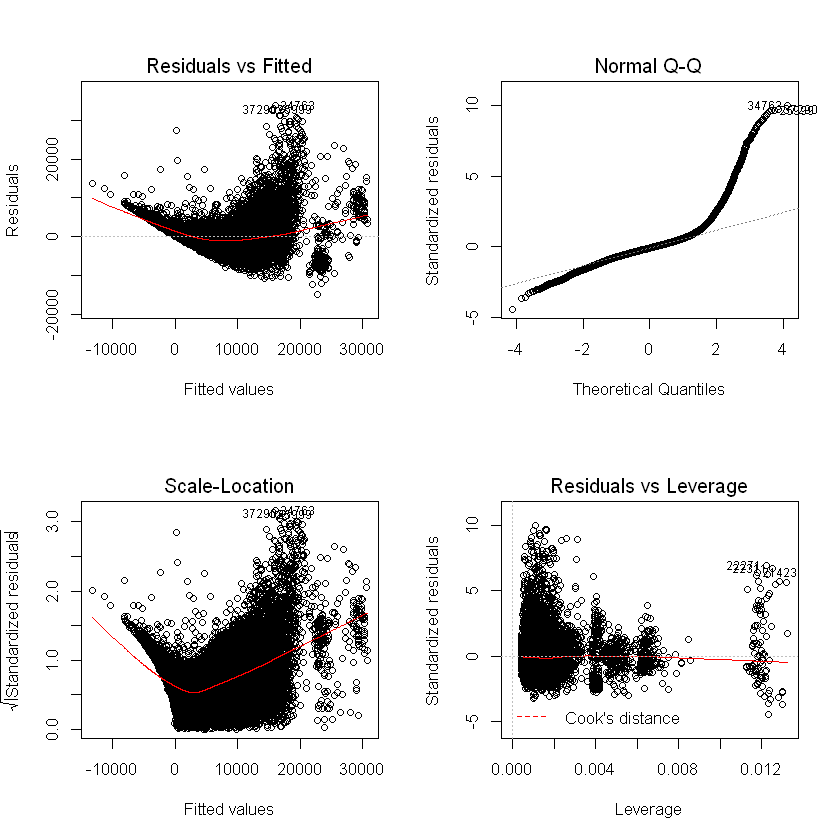

In [189]:
# making graph to show the fitness of model. 

par(mfrow = c(2,2))
plot(car_linear)

Residual VS Fitted graph: shows the strongness of residual's homoskedasticity(The variability in Y values for a given set of predictors 
                                                                                 is the same regradless of the values of the predictors). So, horizontal line represents predicted y value, and vertical line represents residuals (actual value-predicted value). In this graph, the red line is curved much. So, it doesn't seem to satisfy homoskedasticity.

Normal QQ of residuals: plotting two sets of quantiles against one another. 
If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight. But, in this graph, it's hard to be seen as straight.

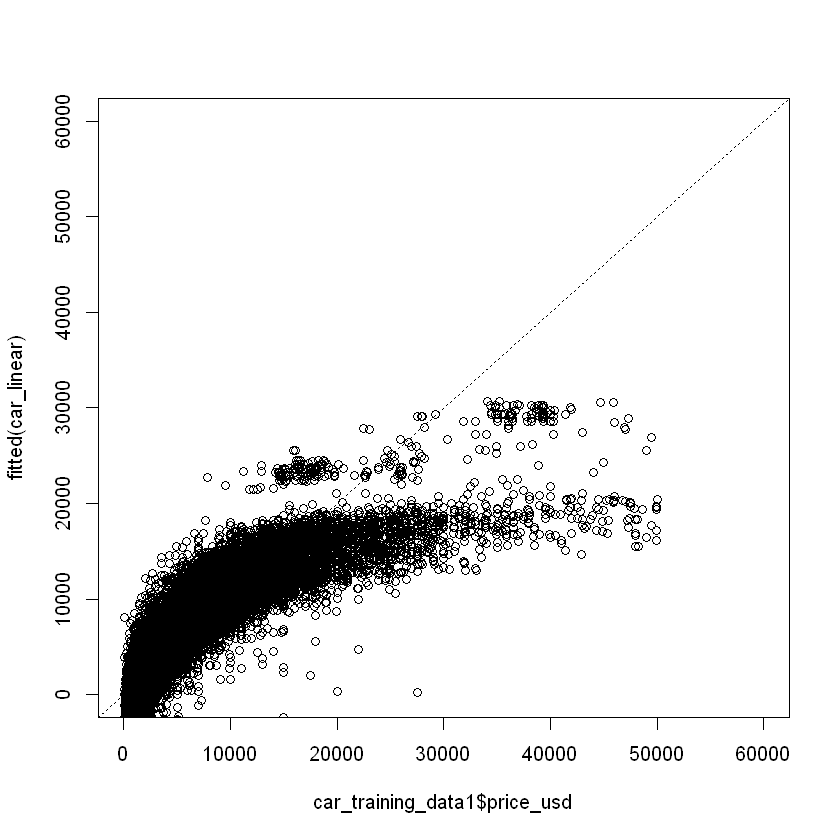

In [190]:
# Plot the result
plot(car_training_data1$price_usd, fitted(car_linear), 
     xlim = c(0,60000), ylim = c(0,60000))
abline(0,1,lty=3)

Here, "car_training_data1$price_usd" is real value of the data,  "fitted(car_linear)" is estimated value. 
So, this graph shows how much the difference is between the actual value and the estimated value.
The slope line means Y=x. Here the dotted plot is not that much concentrated around the slope line, which means this data doesn't
have linearity and less suitable for linear regression model.

In [61]:
car_linear_haty <- predict(car_linear, newdata = car_test_data)
perf_mat[1,] <- perf_eval_reg(car_test_data$price_usd, car_linear_haty)
perf_mat

Warning message in predict.lm(car_linear, newdata = car_test_data):
"prediction from a rank-deficient fit may be misleading"

,RMSE,MAE,MAPE
car,3405.938,2148.64,87.64733


Here, RMSE is 3405.938, MAE is 2148.64, and MAPE is 87.64733.

Here, we interpret MAE and MAPE because those are easy to intuitively understand and thus easy to communicate.

The value of MAE means that on average, the error in price prediction per unit is 2148.64 dollars

The value of MAPE means that there is a relative error of about 87.65% in MLR model based on the actual selling price of each car.

# 7.2 logistic regression

In [ ]:
install.packages("glmnet")
install.packages("GA")
install.packages("mice")

In [62]:
library(glmnet)
library(GA)
library(mice)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.1-1
Warning message:
"package 'GA' was built under R version 3.6.3"Loading required package: foreach
Loading required package: iterators
Package 'GA' version 3.2.1
Type 'citation("GA")' for citing this R package in publications.

Attaching package: 'GA'

The following object is masked from 'package:utils':

    de

Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind



In [63]:
# For classification, the dependent vvariable should be qualitative variable. 
# Therefore, we use binary classification for dependent variable

In [64]:
is.numeric(car_data$price_usd)

[1] TRUE

We can see that the dependent variable(price_usd) is continuous numeric type of variable

In [65]:
price_category=cut(car_data$price_usd, breaks=c(0,25000,50001), labels=c("0","1"), right=FALSE)

But, we change it into categorical variable. If the price is between 0 and 25000, we consider it cheap.
If the price is between 25000 and 50000, we consider it expensive

In [66]:
car_data_for_log <- cbind(price_category,car_data[,-c(1)])

Here, we deduct the continuous numeric value(price_usd) for car_data, and add the qualitative binary variable(price_category).

In [67]:
summary(car_data_for_log)

 price_category odometer_value    year_produced  engine_capacity
 0:36807        Min.   :      0   Min.   :1960   Min.   :0.200  
 1:  862        1st Qu.: 160000   1st Qu.:1998   1st Qu.:1.600  
                Median : 250000   Median :2003   Median :2.000  
                Mean   : 251114   Mean   :2003   Mean   :2.061  
                3rd Qu.: 326000   3rd Qu.:2009   3rd Qu.:2.300  
                Max.   :1000000   Max.   :2019   Max.   :7.500  
 dummy_is_exchangeable dummy_has_warranty dummy_engine_has_gas
 Min.   :0.0000        Min.   :0.00000    Min.   :0.00000     
 1st Qu.:0.0000        1st Qu.:0.00000    1st Qu.:0.00000     
 Median :0.0000        Median :0.00000    Median :0.00000     
 Mean   :0.3542        Mean   :0.01187    Mean   :0.03451     
 3rd Qu.:1.0000        3rd Qu.:0.00000    3rd Qu.:0.00000     
 Max.   :1.0000        Max.   :1.00000    Max.   :1.00000     
 transmission_dummy     black            silver            blue       
 Min.   :0.0000     Min.   :0.000

We can see that priced_category cosists of the values 0 and 1 only. 1 means expensive. 0 menas cheap. 

In [68]:
# We build fuction to evaluate performance.

perf_eval2 <- function(cm){
  
  # True positive rate: TPR 
  TPR <- cm[2,2]/sum(cm[2,])
  # Precision
  PRE <- cm[2,2]/sum(cm[,2])
  # True negative rate: TNR
  TNR <- cm[1,1]/sum(cm[1,])
  # Simple Accuracy
  ACC <- (cm[1,1]+cm[2,2])/sum(cm)
  # F1-Measure
  F1 <- 2*TPR*PRE/(TPR+PRE)
  
  return(c(TPR, PRE, TNR, ACC, F1))
}

In [69]:
# we initialize the performance comparison matrix
perf_mat2 <- matrix(0,nrow = 5, ncol= 5)
colnames(perf_mat2) <- c("TPR ", "Precision", "TNR", "ACC", "F1")
rownames(perf_mat2) <- c("Logstic Regression","Forward", "Backward", "Lidge", "Lasso")


In [70]:
perf_mat2

,TPR,Precision,TNR,ACC,F1
Logstic Regression,0,0,0,0,0
Forward,0,0,0,0,0
Backward,0,0,0,0,0
Lidge,0,0,0,0,0
Lasso,0,0,0,0,0


we will do logistic regression with all variables, and compare 4 feature selection methods( Forwaed selection, Backward selection, Lidge, Lasso)

In [71]:
# We make price_category as target variable, and the other as input variables.

target_idx <- 1
input_idx <- -c(1)


In [72]:
car_input <- car_data_for_log[,input_idx]
car_input <- scale(car_input, center = TRUE, scale = TRUE)
car_target <- as.factor(car_data_for_log[,target_idx])
car_data_log <- data.frame(car_input, car_target)


Here, we normalize the input using "scale" with mean=o and standard deviation=1.
Also we make new data called "car_data_log"

In [73]:
# check whether target variable has converted into binary.

summary(car_target)

0     1 
36807   862

In [74]:
summary(car_data_log)

 odometer_value      year_produced      engine_capacity   
 Min.   :-1.869755   Min.   :-5.59607   Min.   :-2.76809  
 1st Qu.:-0.678422   1st Qu.:-0.67134   1st Qu.:-0.68586  
 Median :-0.008297   Median :-0.02335   Median :-0.09093  
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.557586   3rd Qu.: 0.75423   3rd Qu.: 0.35526  
 Max.   : 5.576075   Max.   : 2.05022   Max.   : 8.08925  
                                                          
 dummy_is_exchangeable dummy_has_warranty dummy_engine_has_gas
 Min.   :-0.7406       Min.   :-0.1096    Min.   :-0.1891     
 1st Qu.:-0.7406       1st Qu.:-0.1096    1st Qu.:-0.1891     
 Median :-0.7406       Median :-0.1096    Median :-0.1891     
 Mean   : 0.0000       Mean   : 0.0000    Mean   : 0.0000     
 3rd Qu.: 1.3502       3rd Qu.:-0.1096    3rd Qu.:-0.1891     
 Max.   : 1.3502       Max.   : 9.1252    Max.   : 5.2892     
                                                              
 transmission_dummy     

As we see, newly created data (car_data_log) is diffenent to previous data(car_data).
This is because in new data, variables are normalized with mean=0 and standard deviation=1.

In [75]:
# We delete the variables with NA values(other_type,other_manufaturer, electric_type, electric ) from new data to exercise glm function.

car_data_log_new <- car_data_log[,c(-21,-23,-29, -36)]

In [76]:
# We split newly created data into training data and test data. 
# 70% of the data is training data, 30% is test data.

set.seed(23456)
car_training_idx2 <- sample(1:nrow(car_data_log_new), round(0.7*nrow(car_data_log_new)))
car_training_data2 <- na.omit(car_data_log_new[car_training_idx2,])
car_test_data2 <- na.omit(car_data_log_new[-car_training_idx2,])

In [77]:
#The first model uses all the variables to create a logistic regression analysis.

full_train <- glm(car_target ~ .,family=binomial, data= car_training_data2)
summary(full_train)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = car_target ~ ., family = binomial, data = car_training_data2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4324  -0.0136  -0.0007   0.0000   5.1350  

Coefficients: (6 not defined because of singularities)
                       Estimate Std. Error z value             Pr(>|z|)    
(Intercept)           -15.28789   31.88368  -0.479             0.631590    
odometer_value         -1.35378    0.18236  -7.423  0.00000000000011409 ***
year_produced           5.44880    0.29544  18.443 < 0.0000000000000002 ***
engine_capacity         1.11815    0.06619  16.892 < 0.0000000000000002 ***
dummy_is_exchangeable   0.04684    0.06574   0.713             0.476146    
dummy_has_warranty     -0.02227    0.04014  -0.555             0.579117    
dummy_engine_has_gas   -0.57356    0.19227  -2.983             0.002853 ** 
transmission_dummy     -0.64764    0.09969  -6.497  0.00000000008212535 ***
black                   0.03423    0.09112   0.376             

Let's watch the result. In predicting whether the price of used car is expensive or cheap, D

Very Important variables(***): odometer_value, year_produced, engine_capacity, transmission_dummy, BMW, Renault, universal,
                                minibus, front. 


Important variables(**): dummy_engine_has_gas.

Less Important variables(*): Audi, sedan, hatchback, new. 

Non-Important variables( ):the remaining variables exept above variables.


NA value is because the variables have colinearity and high correlation with other variables.

In [158]:
#Check the coefficient

full_train_coeff <- as.matrix(full_train$coefficients, 39, 1)
full_train_coeff


(Intercept),-15.28789002
odometer_value,-1.35377620
year_produced,5.44880489
engine_capacity,1.11814710
dummy_is_exchangeable,0.04684299
dummy_has_warranty,-0.02226507
dummy_engine_has_gas,-0.57356355
transmission_dummy,-0.64764174
black,0.03423083
silver,0.05427213
blue,-0.03162395


In [78]:
(exp(full_train$coefficients)-1)*100

(Intercept)        odometer_value         year_produced 
           -99.999977            -74.173684          23148.016118 
      engine_capacity dummy_is_exchangeable    dummy_has_warranty 
           205.918061              4.795745             -2.201903 
 dummy_engine_has_gas    transmission_dummy                 black 
           -43.648625            -47.672165              3.482345 
               silver                  blue                 white 
             5.577188             -3.112914             -6.563850 
                 grey                   red           other_color 
            -4.299027            -17.114066             -2.393976 
           Volkswagen                  Opel                   BMW 
            19.018804            -97.759243             27.533353 
                 Ford               Renault                  Audi 
           -15.095235            -44.349056             15.917933 
               diesel                   gas              gasoline 
            33.407029                    NA            -41.290267 
        hybrid.diesel         hybrid.petrol           diesel_type 
            17.560410                    NA                    NA 
        gasoline_type                 sedan             hatchback 
                   NA            -23.728742            -35.649378 
            universal                   suv               minibus 
           -44.796143              3.505220             72.817405 
            emergency                   new                 owned 
           -79.232733              8.433264                    NA 
                  all                 front                  rear 
            11.508655            -57.907493                    NA

In [151]:
# we test the model and evaluate the classification performance


#Let’s perform predictions. Predict command is used, the full_train model using all variables is used, 
# the type of response means that the we get the probability that value belongs to category 1, and the data used is test data.
lr_response <- predict(full_train, type = "response", newdata = car_test_data2)
lr_target <- car_test_data2$car_target
lr_predicted <- rep(0, length(lr_target))
# we assign 1 if ir_reponse value is greatehrn than or same with 0.5
lr_predicted[which(lr_response >= 0.5)] <- 1
# we make confusion matrix
conmatrix_full <- table(lr_target, lr_predicted)
conmatrix_full

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

         lr_predicted
lr_target     0     1
        0 10988    48
        1   116   149

In [152]:
perf_mat2[1,] <- perf_eval2(conmatrix_full)
perf_mat2

,TPR,Precision,TNR,ACC,F1
Logstic Regression,0.5622642,0.7563452,0.9956506,0.985488,0.6450216
Forward,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
Backward,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
Lidge,0.0000000,0.0000000,0.0000000,0.000000,0.0000000
Lasso,0.0000000,0.0000000,0.0000000,0.000000,0.0000000


In [ ]:
Let's interpret the result above.

When we use all variable

True positive rate: 0.5622642
Precision: 0.7563452
True negative rate: 0.9956506
Accuracy: 0.985488
F1-Measure: 0.6450216
 
  

# 7.3Variable Selection

From now on, let's take a look at how well various variable selection methods or shilinkage methods perform well with 
test data compared to when all variables are used( logistic regresson we've done.

# 7.3.1.Forward selection

In [173]:
#First of all, among the column names,
# We subtract the target variable and paste all the remaining variables to make them into a form of formula.
tmp_x <- paste(colnames(car_training_data2)[-41], collapse=" + ")
# add target_variable again
tmp_xy <- paste("car_target ~ ", tmp_x, collapse = "")
as.formula(tmp_xy)

car_target ~ odometer_value + year_produced + engine_capacity + 
    dummy_is_exchangeable + dummy_has_warranty + dummy_engine_has_gas + 
    transmission_dummy + black + silver + blue + white + grey + 
    red + other_color + Volkswagen + Opel + BMW + Ford + Renault + 
    Audi + diesel + gas + gasoline + hybrid.diesel + hybrid.petrol + 
    diesel_type + gasoline_type + sedan + hatchback + universal + 
    suv + minibus + emergency + new + owned + all + front + rear + 
    car_target

As we see above, currently all varibles is in. However, we exclude some of them with variable selection method.

In [ ]:
# "car_target ~ 1" means that forward model selction start with a model without variables  
# "upper = as.formula(tmp_xy)"" means that upperbound is using all variable. 
#  lower = car_target ~ 1"  means that lowerbond is using no variable.
forward_model <- step(glm(car_target ~ 1, family=binomial, data = car_training_data2), 
                      scope = list(upper = as.formula(tmp_xy), lower = car_target ~ 1), 
                      direction="forward", trace = 1)
summary(forward_model)

In [178]:
#Let.s see the coefficient of survived variables.

forward_model_coeff <- as.matrix(forward_model$coefficients, 39, 1)
forward_model_coeff

(Intercept),-15.13220495
year_produced,5.43089675
front,-0.97124683
engine_capacity,1.13368227
diesel,0.35994952
transmission_dummy,-0.64516422
minibus,0.60760418
odometer_value,-1.32602478
Renault,-0.57236760
universal,-0.41537058
BMW,0.23262646


In [179]:
# Make prediction
forward_model_prob <- predict(forward_model, type = "response", newdata = car_test_data2)
forward_model_prey <- rep(0, nrow(car_test_data2))
forward_model_prey[which(forward_model_prob >= 0.5)] <- 1
forward_model_cm <- table(car_test_data2$car_target, forward_model_prey)
forward_model_cm


   forward_model_prey
        0     1
  0 10993    43
  1   113   152

Let's interpret this result.

Among the actually cheap car, the number of car that is predicted to be cheap is 10993. 
Among the actually cheap car, the number of car that is wrongly predicted to be expensive is 43.

Among the actually expensive car, the number of car that is predicted to be expensive is 152. 
Among the actually expensive car, the number of car that is wrongly predicted to be cheap is 113.

In [180]:
# Peformance evaluation
perf_mat2[2,] <- perf_eval2(forward_model_cm)
perf_mat2

,TPR,Precision,TNR,ACC,F1
Logstic Regression,0.5622642,0.7563452,0.9956506,0.9854880,0.6450216
Forward,0.5735849,0.7794872,0.9961037,0.9861959,0.6608696
Backward,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Lidge,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Lasso,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


# 7.3.2 Backward selection

In [ ]:
# "fstep(ull_train," means that backward model selction start with a model with all variables, which is contrast to forward selection.  
# "upper = as.formula(tmp_xy)"" means that upperbound is using all variable. 
#  lower = car_target ~ 1"  means that lowerbond is using no variable.

backward_model <- step(full_train, 
                      scope = list(upper = as.formula(tmp_xy), lower = car_target ~ 1), 
                      direction="backward", trace = 1)
summary(backward_model)


When we see the survived variables after backward seletion, the number of vectors decrease from 38 to 21. 


In [183]:
backward_model_coeff <- as.matrix(backward_model$coefficients, 39, 1)
backward_model_coeff

(Intercept),-15.18163360
odometer_value,-1.31680877
year_produced,5.37875846
engine_capacity,1.10482333
dummy_engine_has_gas,-0.67676513
transmission_dummy,-0.65714840
red,-0.17987375
Volkswagen,0.18106726
Opel,-3.78707491
BMW,0.24182033
Ford,-0.17093026


In [184]:
# Make prediction
backward_model_prob <- predict(backward_model, type = "response", newdata = car_test_data2)
backward_model_prey <- rep(0, nrow(car_test_data2))
backward_model_prey[which(backward_model_prob >= 0.5)] <- 1
backward_model_cm <- table(car_test_data2$car_target, backward_model_prey)
backward_model_cm

   backward_model_prey
        0     1
  0 10992    44
  1   116   149

In [185]:
# Peformance evaluation
perf_mat2[3,] <- perf_eval2(backward_model_cm)
perf_mat2

,TPR,Precision,TNR,ACC,F1
Logstic Regression,0.5622642,0.7563452,0.9956506,0.9854880,0.6450216
Forward,0.5735849,0.7794872,0.9961037,0.9861959,0.6608696
Backward,0.5622642,0.7720207,0.9960130,0.9858420,0.6506550
Lidge,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
Lasso,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [ ]:
Let's interpret the result above.

When the number of dependent variables decreases from 38 to 21 with backward slection,  

True positive rate: 0.5622642
Precision: 	0.7720207
True negative rate: 0.9960130
Accuracy: 0.9858420
F1-Measure: 0.6506550

This results are better than when we use all variables. However, the performance is worse than when we use forward selection.

# 7.3.3 Ridge logistic regression

In [186]:
# Here, we transform independent variable to matrix type, and dependent variable as factor type in both training set and test set.
car_training_X <- as.matrix(car_training_data2[,-39])
car_training_y <- as.factor(car_training_data2[,39])

car_test_X <- as.matrix(car_test_data2[,-39])
car_test_y <- as.factor(car_test_data2[,39])

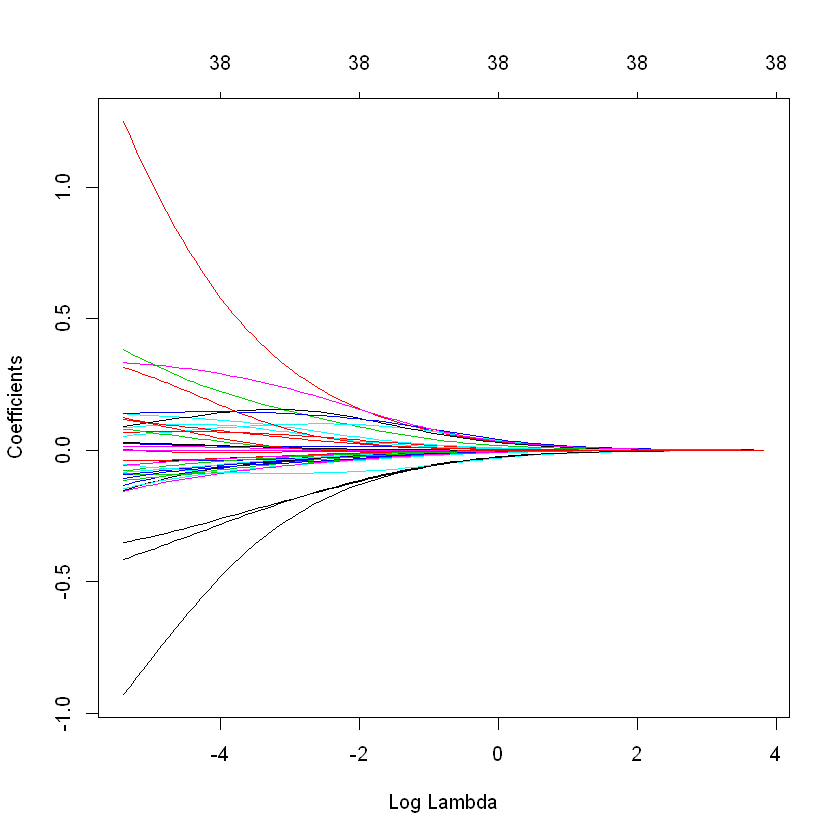

In [187]:
# we create glmnet command to create Ridge Legression.
Ridge_model <- glmnet(car_training_X, car_training_y, family = "binomial", alpha = 0)
plot(Ridge_model, xvar = "lambda")

When we plot the result of Lidge regression, we can see that as Log Lambda increase, coefficient converges. But, the problem here is 
what the best Lambda is. To get answer about this, we use 5-fold cross validation.

In 5-fold cross validation, 
we bring the training data, divide it into 5 parts.
Among these 5 parts, we crossly use the 4 parts as training and the other 1 part as test.

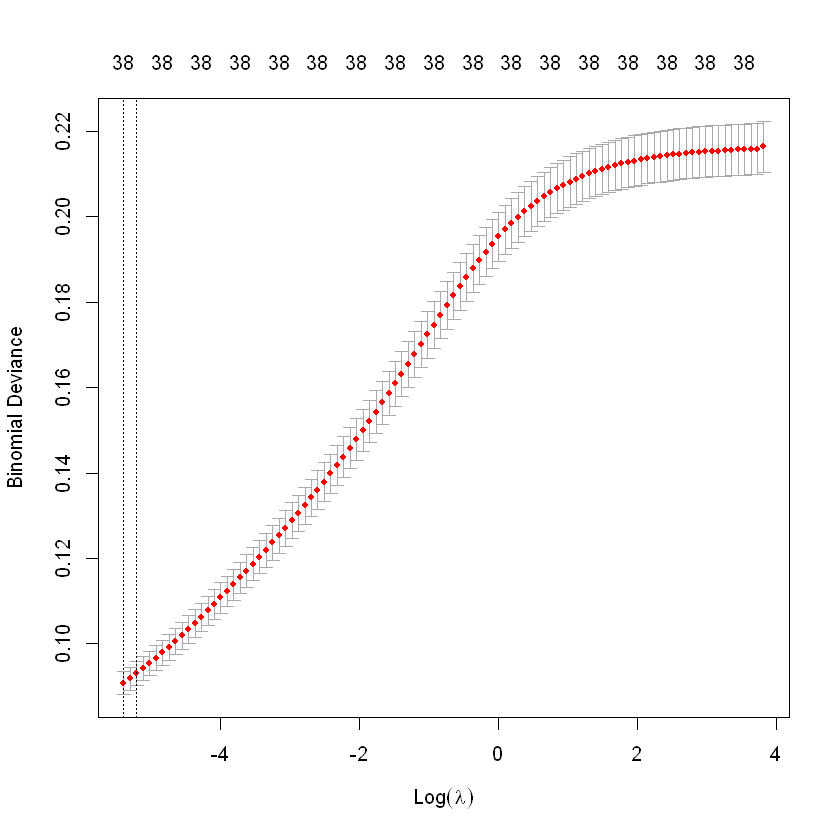

In [188]:
# Find the best lambda based in 5-fold cross validation
#alpha=0, because of Lidge Regression
CV_Ridge <- cv.glmnet(car_training_X, car_training_y, family = "binomial", alpha = 0)
plot(CV_Ridge)
best_lambda <- CV_Ridge$lambda.min

In [189]:
best_lambda

[1] 0.004557202

In [190]:
# Check the coefficients
Ridge_model_coeff <- predict(Ridge_model, s = best_lambda, newx = car_validation_X, type = "coefficient")
Ridge_model_coeff

39 x 1 sparse Matrix of class "dgCMatrix"
                                   1
(Intercept)           -6.72975974151
odometer_value        -0.92868181290
year_produced          1.25010961616
engine_capacity        0.38266458411
dummy_is_exchangeable  0.02574362597
dummy_has_warranty     0.05399588670
dummy_engine_has_gas  -0.09327690784
transmission_dummy    -0.41420440157
black                  0.06800136647
silver                -0.08825024527
blue                  -0.03938331159
white                  0.08526724386
grey                   0.01348116088
red                   -0.05904047921
other_color           -0.04008518694
Volkswagen             0.08083641108
Opel                  -0.13206403060
BMW                    0.13798827087
Ford                  -0.05808008980
Renault               -0.15428889563
Audi                   0.00294475765
diesel                 0.11514726141
gas                   -0.09341134667
gasoline              -0.08250238952
hybrid.diesel         -0.00002211

In [192]:
# Make predictions
Ridge_model_predy <- predict(Ridge_model, s = best_lambda, newx = car_test_X, type = "class")
Ridge_model_predy <- as.factor(Ridge_model_predy)
Ridge_model_cm <- table(car_test_y, Ridge_model_predy)
Ridge_model_cm

          Ridge_model_predy
car_test_y     0     1
         0 11030     6
         1   200    65

In [193]:
# Peformance evaluation
perf_mat2[4,] <- perf_eval2(Ridge_model_cm)
perf_mat2

,TPR,Precision,TNR,ACC,F1
Logstic Regression,0.5622642,0.7563452,0.9956506,0.9854880,0.6450216
Forward,0.5735849,0.7794872,0.9961037,0.9861959,0.6608696
Backward,0.5622642,0.7720207,0.9960130,0.9858420,0.6506550
Lidge,0.2452830,0.9154930,0.9994563,0.9817715,0.3869048
Lasso,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [ ]:
Let's interpret the result above.

When we use Lidge regression, 

True positive rate: 0.2452830
Precision: 0.9154930
True negative rate: 0.9994563
Accuracy: 0.9817715
F1-Measure: 0.3869048



# 7.3.4. Lasso regression

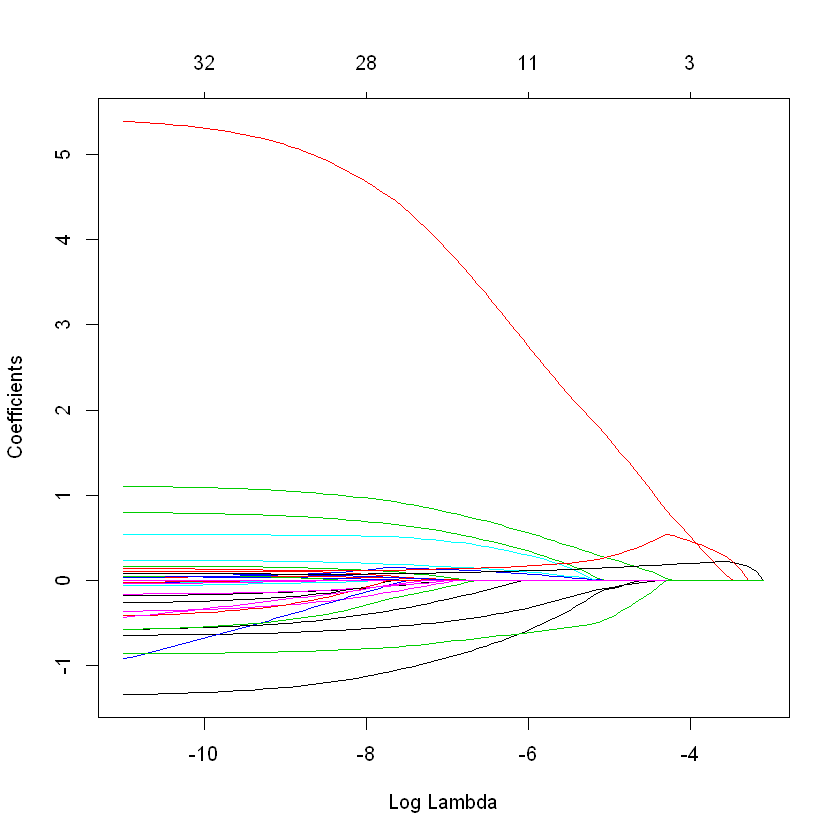

In [194]:
#Alpha is 1 because this is Lasso
Lasso_model <- glmnet(car_training_X, car_training_y, family = "binomial", alpha = 1)
plot(Lasso_model, xvar = "lambda")


In case of Lidge Regression, the values of coefficient doesn't converge on 0. 
But in case of Lasso Regression, it does.

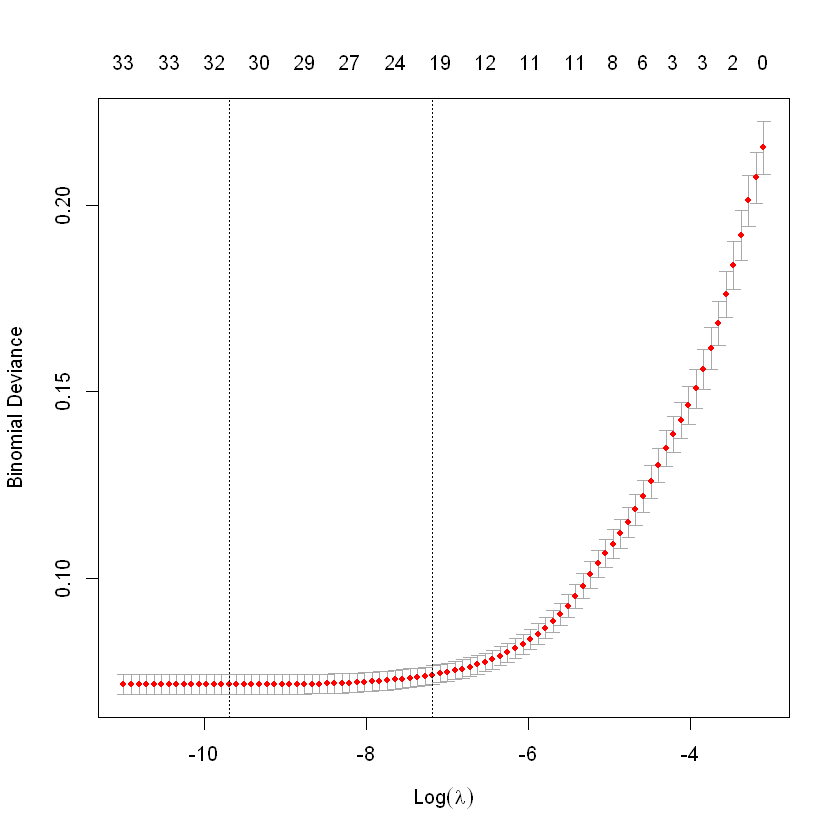

In [195]:
# Find the best lambda based in 5-fold cross validation
CV_Lasso <- cv.glmnet(car_training_X, car_training_y, family = "binomial", alpha = 1)
plot(CV_Lasso)
best_lambda_Lasso <- CV_Lasso$lambda.min

In [198]:
best_lambda_Lasso

[1] 0.00006166112

In [199]:
# Check the coefficients
Lasso_model_coeff <- predict(Lasso_model, s = best_lambda, newx = car_validation_X, type = "coefficient")
Lasso_model_coeff

39 x 1 sparse Matrix of class "dgCMatrix"
                                1
(Intercept)           -6.41586294
odometer_value        -0.29526980
year_produced          2.06320513
engine_capacity        0.37653103
dummy_is_exchangeable  .         
dummy_has_warranty     .         
dummy_engine_has_gas   .         
transmission_dummy    -0.17062129
black                  .         
silver                 .         
blue                   .         
white                  .         
grey                   .         
red                    .         
other_color            .         
Volkswagen             .         
Opel                   .         
BMW                    0.04028546
Ford                   .         
Renault                .         
Audi                   .         
diesel                 0.14208997
gas                    .         
gasoline               .         
hybrid.diesel          .         
hybrid.petrol          .         
diesel_type            .         
gasoli

In [201]:
# Make predictions
Lasso_model_prey <- predict(Lasso_model, s = best_lambda, newx = car_test_X, type = "class")
Lasso_model_prey <- as.factor(Lasso_model_prey)
Lasso_model_cm <- table(car_test_y, Lasso_model_prey)
Lasso_model_cm

          Lasso_model_prey
car_test_y     0     1
         0 11033     3
         1   220    45

In [202]:
# Peformance evaluation
perf_mat2[5,] <- perf_eval2(Lasso_model_cm)
perf_mat2

,TPR,Precision,TNR,ACC,F1
Logstic Regression,0.5622642,0.7563452,0.9956506,0.9854880,0.6450216
Forward,0.5735849,0.7794872,0.9961037,0.9861959,0.6608696
Backward,0.5622642,0.7720207,0.9960130,0.9858420,0.6506550
Lidge,0.2452830,0.9154930,0.9994563,0.9817715,0.3869048
Lasso,0.1698113,0.9375000,0.9997282,0.9802672,0.2875399


In [207]:
#Using all variable
mean(lr_predicted!=lr_target)
# Forward selection
mean(forward_model_prey!=lr_target)
# Backward selection
mean(backward_model_prey!=lr_target)
# Lidge
mean(Ridge_model_predy!=lr_target)
# Lasso
mean(Lasso_model_prey!=lr_target)

[1] 0.01451199

[1] 0.01380409

[1] 0.01415804

[1] 0.01822848

[1] 0.01973277

When we use Forward selection, we ger the smallest error rate.

# 7.4 Decision Trees

In [227]:
# For classification tree, we use post_pruning and pre_pruning
Perf_Table3 <- matrix(0, nrow = 2, ncol = 5)
rownames(Perf_Table3) <- c("Post-Pruning", "Pre-Pruning")
colnames(Perf_Table3) <- c("TPR", "Precision", "TNR", "Accuracy", "F1-Measure")
Perf_Table3

,TPR,Precision,TNR,Accuracy,F1-Measure
Post-Pruning,0,0,0,0,0
Pre-Pruning,0,0,0,0,0


# 7.4.1 post-pruning

In [209]:
install.packages("tree")
library(tree)

Warning message:
"package 'tree' was built under R version 3.6.3"Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 


In [210]:
# In this part, we will use the data created  at the beggining logistic regression part. 
#So, dependent variables are 0 and 1(cheap and expensive), and data is not scaled.
summary(car_data_for_log)

 price_category odometer_value    year_produced  engine_capacity
 0:36807        Min.   :      0   Min.   :1960   Min.   :0.200  
 1:  862        1st Qu.: 160000   1st Qu.:1998   1st Qu.:1.600  
                Median : 250000   Median :2003   Median :2.000  
                Mean   : 251114   Mean   :2003   Mean   :2.061  
                3rd Qu.: 326000   3rd Qu.:2009   3rd Qu.:2.300  
                Max.   :1000000   Max.   :2019   Max.   :7.500  
 dummy_is_exchangeable dummy_has_warranty dummy_engine_has_gas
 Min.   :0.0000        Min.   :0.00000    Min.   :0.00000     
 1st Qu.:0.0000        1st Qu.:0.00000    1st Qu.:0.00000     
 Median :0.0000        Median :0.00000    Median :0.00000     
 Mean   :0.3542        Mean   :0.01187    Mean   :0.03451     
 3rd Qu.:1.0000        3rd Qu.:0.00000    3rd Qu.:0.00000     
 Max.   :1.0000        Max.   :1.00000    Max.   :1.00000     
 transmission_dummy     black            silver            blue       
 Min.   :0.0000     Min.   :0.000

In [211]:
# price_category is target and the others are input
input_idx2 <- -c(1)
target_idx2 <- 1

In [212]:
# we create new data frame(= car_data_log2)
car_input2 <- car_data_for_log[,input_idx2]
car_target2 <- car_data_for_log[,target_idx2]
car_data_log2 <- data.frame(car_target2, car_input2)


In [213]:
summary(car_data_log2)

 car_target2 odometer_value    year_produced  engine_capacity
 0:36807     Min.   :      0   Min.   :1960   Min.   :0.200  
 1:  862     1st Qu.: 160000   1st Qu.:1998   1st Qu.:1.600  
             Median : 250000   Median :2003   Median :2.000  
             Mean   : 251114   Mean   :2003   Mean   :2.061  
             3rd Qu.: 326000   3rd Qu.:2009   3rd Qu.:2.300  
             Max.   :1000000   Max.   :2019   Max.   :7.500  
 dummy_is_exchangeable dummy_has_warranty dummy_engine_has_gas
 Min.   :0.0000        Min.   :0.00000    Min.   :0.00000     
 1st Qu.:0.0000        1st Qu.:0.00000    1st Qu.:0.00000     
 Median :0.0000        Median :0.00000    Median :0.00000     
 Mean   :0.3542        Mean   :0.01187    Mean   :0.03451     
 3rd Qu.:1.0000        3rd Qu.:0.00000    3rd Qu.:0.00000     
 Max.   :1.0000        Max.   :1.00000    Max.   :1.00000     
 transmission_dummy     black            silver            blue       
 Min.   :0.0000     Min.   :0.0000   Min.   :0.0000   

In [214]:
car_data_log_new2<- car_data_log2[,c(-21,-23,-29,-36)]

In [215]:
# We split data into traing set (70% of whole data) and test set(30% of whole data).
set.seed(23456)
car_training_idx3 <- sample(1:nrow(car_data_log_new2), round(0.7*nrow(car_data_log_new2)))
car_training_data3 <- na.omit(car_data_log_new2[car_training_idx3,])
car_test_data3 <- na.omit(car_data_log_new2[-car_training_idx3,])

In [216]:
summary(car_data_log_new2)

 car_target2 odometer_value    year_produced  engine_capacity
 0:36807     Min.   :      0   Min.   :1960   Min.   :0.200  
 1:  862     1st Qu.: 160000   1st Qu.:1998   1st Qu.:1.600  
             Median : 250000   Median :2003   Median :2.000  
             Mean   : 251114   Mean   :2003   Mean   :2.061  
             3rd Qu.: 326000   3rd Qu.:2009   3rd Qu.:2.300  
             Max.   :1000000   Max.   :2019   Max.   :7.500  
 dummy_is_exchangeable dummy_has_warranty dummy_engine_has_gas
 Min.   :0.0000        Min.   :0.00000    Min.   :0.00000     
 1st Qu.:0.0000        1st Qu.:0.00000    1st Qu.:0.00000     
 Median :0.0000        Median :0.00000    Median :0.00000     
 Mean   :0.3542        Mean   :0.01187    Mean   :0.03451     
 3rd Qu.:1.0000        3rd Qu.:0.00000    3rd Qu.:0.00000     
 Max.   :1.0000        Max.   :1.00000    Max.   :1.00000     
 transmission_dummy     black            silver            blue       
 Min.   :0.0000     Min.   :0.0000   Min.   :0.0000   

In [217]:
# training tree(post prunung)

CAR_post <- tree(car_target2 ~ ., car_training_data3)
summary(CAR_post)


Classification tree:
tree(formula = car_target2 ~ ., data = car_training_data3)
Variables actually used in tree construction:
[1] "year_produced"   "engine_capacity" "front"           "odometer_value" 
Number of terminal nodes:  10 
Residual mean deviance:  0.08996 = 2371 / 26360 
Misclassification error rate: 0.0176 = 464 / 26368 

Let's interpret this result. To make tree, only five variables are used: 
"year_produced", "engine_capacity", "front",  "odometer_value", "minibus".

it has 10 leaf nodes

Among 26368 observations, 464 observarions are misclassified, so the error rate is 0.0176.

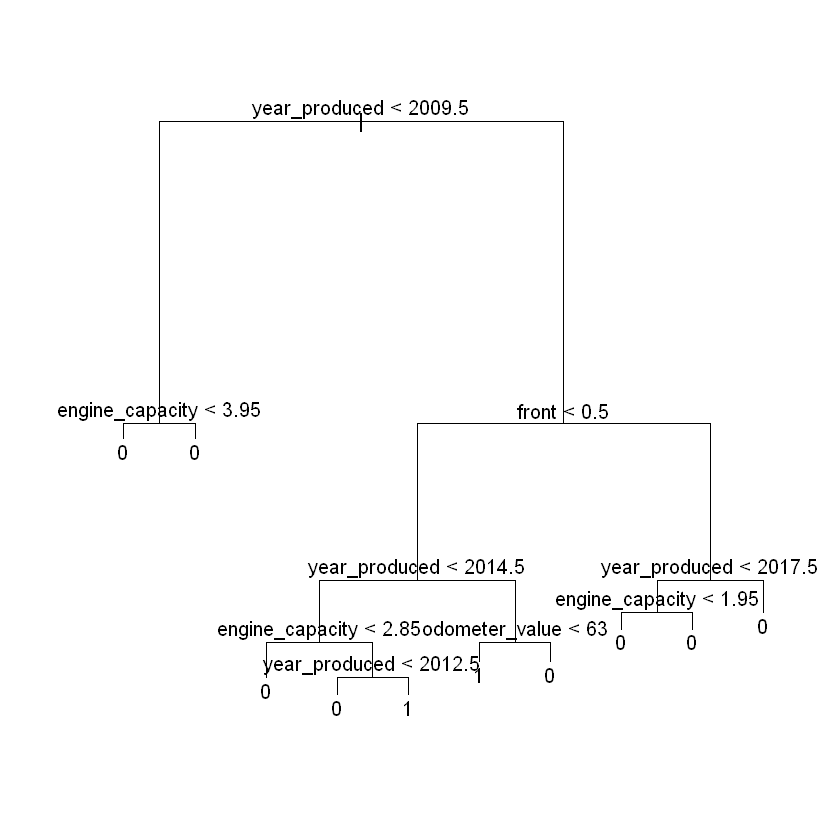

In [218]:
# Plot the tree with text
plot(CAR_post)
text(CAR_post, pretty = 1)

Without pruning, the tree has 10 leaf nodes.

In [219]:
# Find the best tree
set.seed(12222)
CAR_post_cv <- cv.tree(CAR_post, FUN = prune.misclass)

we use cross validation("cv.tree") here to find the best tree.
So, we bring the training data, divide it into 5 parts.
Among these 5 parts, we crossly use the 4 parts as training and the other 1 part as test.

"FUN = prune.misclass" means that we order the pruning minimizes Misclassification rate.

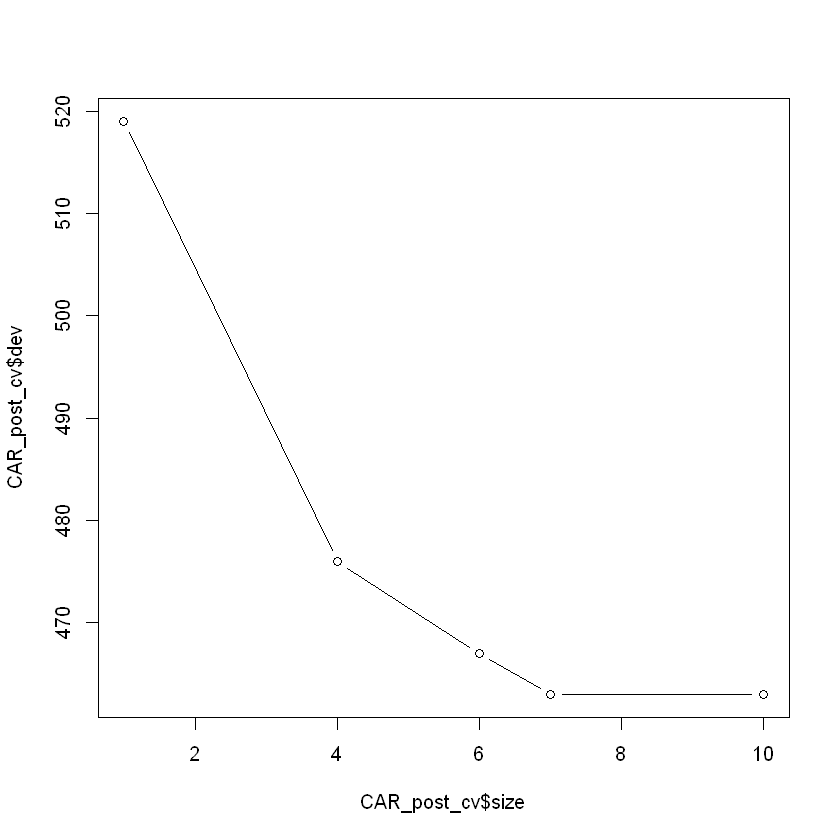

In [221]:
# Plot the pruning result
plot(CAR_post_cv$size, CAR_post_cv$dev, type = "b")


Let's see the result. horizontal line represents leaf nodes, and verical line represents deviance, that is, Impurity. 
As the number of nodes increases, the deviance(=impurity) decreases.
In other words, the more we split the tree, diviance decreases.
However, even though the deviance dramatically decrease at beggining, it decrease timidly beyond a certain point of the number of nodes.
Let's see this result more specifically next.

In [222]:
CAR_post_cv

$size
[1] 10  7  6  4  1

$dev
[1] 463 463 467 476 519

$k
[1]     -Inf  0.00000  7.00000 20.00000 28.66667

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

When 1 node exists, the deviance is 519.
When 4, 476
when 6, 467.
when 7, 463.
when 10, 463.
After 7 nodes, the deviance decrease little. So, we can guess that at 7 nodes, it is the best tree.

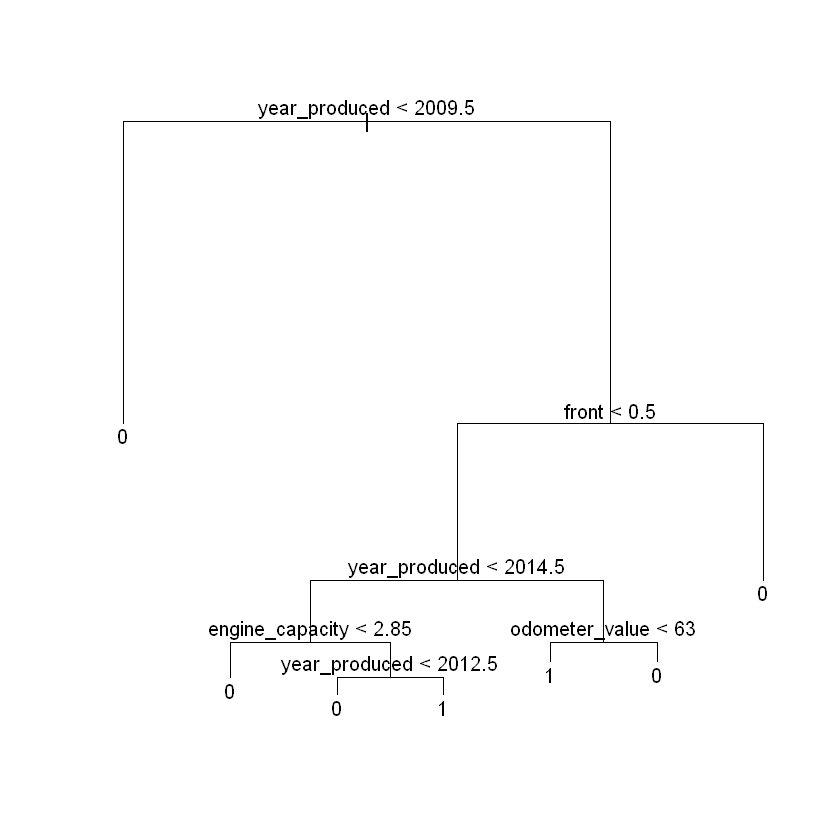

In [223]:
# Select the final model at 7 nodes.

# Changing the original tree(CAR_post) to have only 7 leaf nodes
CAR_post_pruned <- prune.misclass(CAR_post, best = 7)
plot(CAR_post_pruned)
text(CAR_post_pruned, pretty = 1)

Let's see the result above. When we didn't post-pruning it has 10 leaf nodes. 
However, in post-pruning, we remove 3 leaf nodes to build the best tree.

In [224]:
# Prediction
# Let' see that using post-pruned tree, how high prediction accuracy is with test data.
CAR_post_prey <- predict(CAR_post_pruned, car_test_data3, type = "class")
CAR_post_cm <- table(car_test_data3$car_target2, CAR_post_prey)
CAR_post_cm

   CAR_post_prey
        0     1
  0 11016    20
  1   179    86

In [228]:
Perf_Table3[1,] <- perf_eval2(CAR_post_cm)
Perf_Table3

,TPR,Precision,TNR,Accuracy,F1-Measure
Post-Pruning,0.3245283,0.8113208,0.9981877,0.9823909,0.4636119
Pre-Pruning,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


# 7.4.2 pre-pruning

In [230]:
# For CART
install.packages("party")
library(party)

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"

In [231]:
# For AUROC
install.packages("ROCR")
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.3"

In [239]:
# Divide the dataset into training( 60% of data)/validation(10% of data)/test datasets(20% of data)
car_training_idx4 <- sample(1:nrow(car_data_log_new2), round(0.6*nrow(car_data_log_new2)))
car_test_idx4 <- sample(1:nrow(car_data_log_new2), round(0.3*nrow(car_data_log_new2)))
car_validation_idx4 <- sample(1:nrow(car_data_log_new2), round(0.1*nrow(car_data_log_new2)))


In [240]:
set.seed(23456)

car_training_data4 <- na.omit(car_data_log_new2[car_training_idx4,])

car_test_data4 <- na.omit(car_data_log_new2[car_test_idx4,])

car_validation_data4 <- na.omit(car_data_log_new2[car_validation_idx4,])


Here, we use 10% of data for validation data. This validation data set will be usd to optimize paprameters below.

In [241]:
# min_criterion is minimum statistical significance to spilit the current node
min_criterion = c(0.9, 0.95, 0.99) 
# min_split is minimum number of onservations to consider splitting the current nodes
min_split = c(50, 100, 300, 500)
# max_depth is maximum depth of the entire tree
max_depth = c(0, 10, 5)



min_criterion:
in party package, deviance and Gini index aren't be  used. 
Instead, after splitting tree, a statistical test is used on how significant the decrease in impurity is 
between before and after splitting. Here, we fix significance level as 90%, 95%, 99%.
This means that spilit will be allowed only when sinigficance level is over 90%, 95%, 0r 99%. 

min_split:
In "min_split", the number 50 means that “at least, minimum 50 observations must exist in a node in order for a split to be attempted.

max_depth:
In case of "max_depth", the number in bracket means the depth of tree. Depth of tree is the same with the the number of splitting.


In [242]:
# total 36 composition will be created. 3 min_criterion x 4 min_split x 3 max_depth= 36
CAR_pre_search_result = 
matrix(0,length(min_criterion)*length(min_split)*length(max_depth),11)

colnames(CAR_pre_search_result) <- c("min_criterion", "min_split", "max_depth", 
                           "TPR", "Precision", "TNR", "ACC", "BCR", "F1", "AUROC", "N_leaves")

In [245]:
# We try to find optimal parameters here. And run for loop for three different medel paprmeter(min_criterion, min_split,max-depth)


iter_cnt = 1

for (i in 1:length(min_criterion)){
  for ( j in 1:length(min_split)){
    for ( k in 1:length(max_depth)){
      
      cat("CAR Min criterion:", min_criterion[i], ", Min split:", min_split[j], ", Max depth:", max_depth[k], "\n")
      tmp_control = ctree_control(mincriterion = min_criterion[i], minsplit = min_split[j], maxdepth = max_depth[k])
      tmp_tree <- ctree(car_target2 ~ ., data = car_training_data4, controls = tmp_control)
      tmp_tree_val_prediction <- predict(tmp_tree, newdata = car_validation_data4)
      tmp_tree_val_response <- treeresponse(tmp_tree, newdata = car_validation_data4)
      tmp_tree_val_prob <- 1-unlist(tmp_tree_val_response, use.names=F)[seq(1,nrow(car_validation_data4)*2,2)]
      tmp_tree_val_rocr <- prediction(tmp_tree_val_prob, car_validation_data4$car_target2)
      # Confusion matrix for the validation dataset
      tmp_tree_val_cm <- table(car_validation_data4$car_target2, tmp_tree_val_prediction)
      
      # parameters
      CAR_pre_search_result[iter_cnt,1] = min_criterion[i]
      CAR_pre_search_result[iter_cnt,2] = min_split[j]
      CAR_pre_search_result[iter_cnt,3] = max_depth[k]
      # Performances from the confusion matrix
      CAR_pre_search_result[iter_cnt,4:8] = perf_eval2(tmp_tree_val_cm)
      # AUROC
      CAR_pre_search_result[iter_cnt,10] = unlist(performance(tmp_tree_val_rocr, "auc")@y.values)
      # Number of leaf nodes
      CAR_pre_search_result[iter_cnt,11] = length(nodes(tmp_tree, unique(where(tmp_tree))))
      iter_cnt = iter_cnt + 1
    }
  }
}

CAR Min criterion: 0.9 , Min split: 50 , Max depth: 0 
CAR Min criterion: 0.9 , Min split: 50 , Max depth: 10 
CAR Min criterion: 0.9 , Min split: 50 , Max depth: 5 
CAR Min criterion: 0.9 , Min split: 100 , Max depth: 0 
CAR Min criterion: 0.9 , Min split: 100 , Max depth: 10 
CAR Min criterion: 0.9 , Min split: 100 , Max depth: 5 
CAR Min criterion: 0.9 , Min split: 300 , Max depth: 0 
CAR Min criterion: 0.9 , Min split: 300 , Max depth: 10 
CAR Min criterion: 0.9 , Min split: 300 , Max depth: 5 
CAR Min criterion: 0.9 , Min split: 500 , Max depth: 0 
CAR Min criterion: 0.9 , Min split: 500 , Max depth: 10 
CAR Min criterion: 0.9 , Min split: 500 , Max depth: 5 
CAR Min criterion: 0.95 , Min split: 50 , Max depth: 0 
CAR Min criterion: 0.95 , Min split: 50 , Max depth: 10 
CAR Min criterion: 0.95 , Min split: 50 , Max depth: 5 
CAR Min criterion: 0.95 , Min split: 100 , Max depth: 0 
CAR Min criterion: 0.95 , Min split: 100 , Max depth: 10 
CAR Min criterion: 0.95 , Min split: 100 , 

In [246]:
# Find the best set of parameters
CAR_pre_search_result <- CAR_pre_search_result[order(CAR_pre_search_result[,10], decreasing = T),]
CAR_pre_search_result
best_criterion <- CAR_pre_search_result[1,1]
best_split <- CAR_pre_search_result[1,2]
best_depth <- CAR_pre_search_result[1,3]

min_criterion,min_split,max_depth,TPR,Precision,TNR,ACC,BCR,F1,AUROC,N_leaves
0.90,50,0,0.4024390,0.7021277,0.9962008,0.9832758,0.5116279,0,0.9850233,37
0.90,50,10,0.4024390,0.7021277,0.9962008,0.9832758,0.5116279,0,0.9850233,37
0.90,100,0,0.3780488,0.7045455,0.9964722,0.9830104,0.4920635,0,0.9846974,33
0.90,100,10,0.3780488,0.7045455,0.9964722,0.9830104,0.4920635,0,0.9846974,33
0.95,50,0,0.4024390,0.7021277,0.9962008,0.9832758,0.5116279,0,0.9841381,35
0.95,50,10,0.4024390,0.7021277,0.9962008,0.9832758,0.5116279,0,0.9841381,35
0.95,100,0,0.3780488,0.7045455,0.9964722,0.9830104,0.4920635,0,0.9837691,31
0.95,100,10,0.3780488,0.7045455,0.9964722,0.9830104,0.4920635,0,0.9837691,31
0.99,50,0,0.4024390,0.7021277,0.9962008,0.9832758,0.5116279,0,0.9836102,29
0.99,50,10,0.4024390,0.7021277,0.9962008,0.9832758,0.5116279,0,0.9836102,29


Let's interpret the result. The best composion of the three parameter is when min_criterion=0.90, min_split=100, and when max_depth=5.
For the measure of standard for the best composition , AUROC(area under the ROC curve) is used. 
The best composion of those 3 parmeters has 0.9710272 AUROC

In [247]:
# Construct the best tree (min_criterion=0.90, min_split=100, max_depth=5)
tree_control = ctree_control(mincriterion = best_criterion, minsplit = best_split, maxdepth = best_depth)

In [248]:
# Use the training and validation dataset to train the best tree


# We combine training data and validation data to create new training data, which creates the same portion of training data(70%) with post-pruning. 
car_training_data4_new <- rbind(car_training_data4,car_validation_data4)

# train the best tree
CAR_pre <- ctree(car_target2~ ., data = car_training_data4, controls = tree_control)
CAR_pre_prediction <- predict(CAR_pre, newdata = car_test_data4)
CAR_pre_response <- treeresponse(CAR_pre, newdata = car_test_data4)

In [250]:
# Performance of the best tree
CAR_pre_cm <- table(car_test_data4$car_target2, CAR_pre_prediction)
CAR_pre_cm

   CAR_pre_prediction
        0     1
  0 11049    20
  1   126   106

In [252]:
Perf_Table3[2,] <- perf_eval2(CAR_pre_cm)
Perf_Table3


,TPR,Precision,TNR,Accuracy,F1-Measure
Post-Pruning,0.3245283,0.8113208,0.9981877,0.9823909,0.4636119
Pre-Pruning,0.4568966,0.8412698,0.9981932,0.9870808,0.5921788


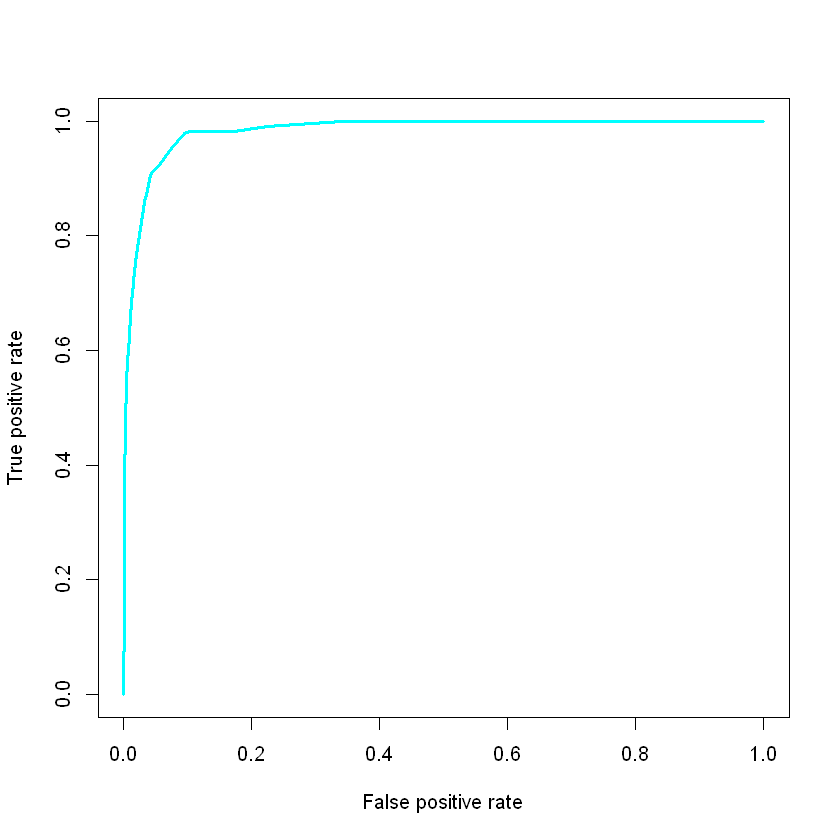

In [253]:
# Plot the ROC
CAR_pre_prob <- 1-unlist(CAR_pre_response, use.names=F)[seq(1,nrow(car_test_data4)*2,2)]
CAR_pre_rocr <- prediction(CAR_pre_prob, car_test_data4$car_target2)
CAR_pre_perf <- performance(CAR_pre_rocr, "tpr","fpr") 
plot(CAR_pre_perf, col=5, lwd = 3)

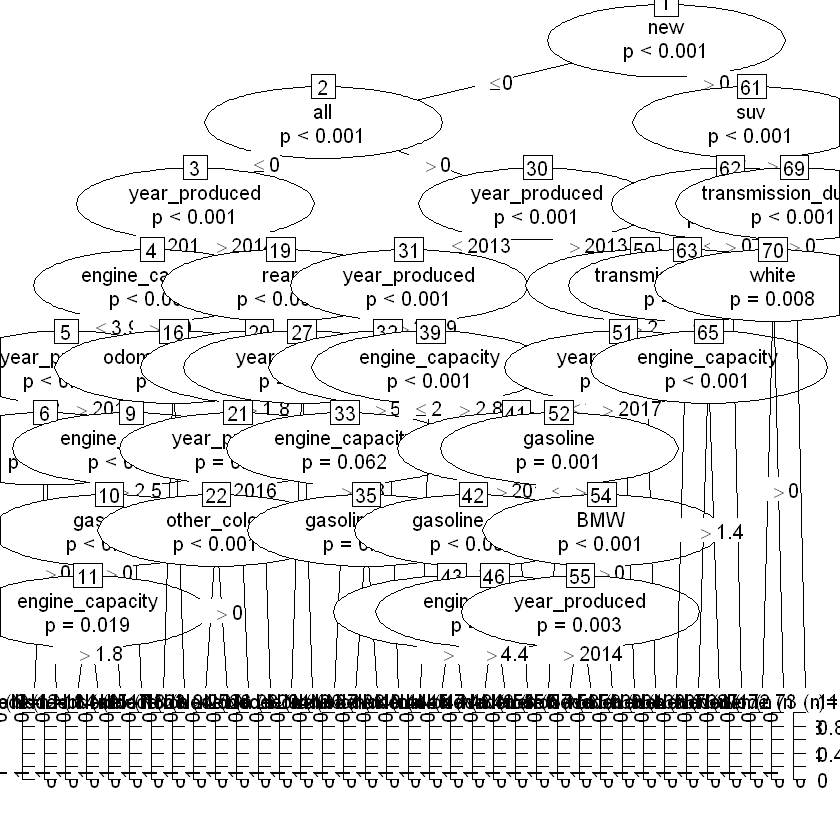

In [254]:
# Plot the best tree
plot(CAR_pre)


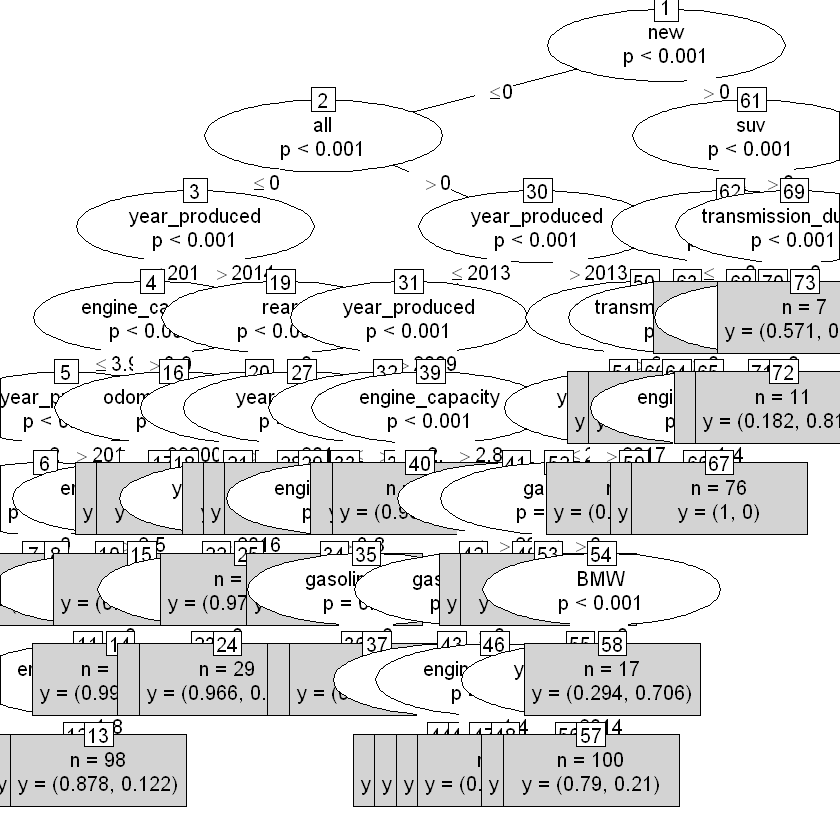

In [257]:
plot(CAR_pre, type="simple")

In [1]:
#CLUSTERING
#clustering works to group data points together based on similaries
data = read.csv("cars_new.csv")
set.seed(13)
indices = sample(nrow(data1), .70 * nrow(data))
train = data[indices, ]
test = data[-indices, ]
#copy data
test1 = test

#removal of data that isnt numerical for k-means
test1$is_exchangeable = NULL
test1$has_warrenty = NULL
test1$engine_has_gas = NULL
test1$has_warrenty = NULL
test1$state = NULL
test1$manufacturer_name = NULL
test1$color = NULL
test1$model_name = NULL
test1$engine_fuel = NULL
test1$engine_type = NULL
test1$body_type = NULL
test1$has_warranty = NULL
test1$drivetrain = NULL
test1$transmission = NULL
test1 = na.omit(test1)

#clustering
results = kmeans(test1,3)
results

table(test1$odometer_value, results$cluster)
plot(test1[c("odometer_value","price_usd")],col = results$cluster)
#clustering performed well when grouping odometer values and price. 
#we are able to see distinct clusters and grouping.
#this shows that clustering performs well between odometer_value and price_usd

table(test1$engine_capacity, results$cluster)
plot(test1[c("engine_capacity","price_usd")],col = results$cluster)
#clustering does not work well with engine_capacity.
#the table as well as the plot backs up this claim as clusters are overlapping in the plot
#and years are found in multiple clusters in the table.

table(test1$year_produced, results$cluster)
plot(test1[c("year_produced","price_usd")],col = results$cluster)
#clustering does not work well with year_produced.
#the table as well as the plot backs up this claim as clusters are overlapping in the plot
#and years are found in multiple clusters in the table.

Warning message in file(file, "rt"):
"cannot open file 'cars_new.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


# 8. conclusion

# 9.How your contribution different from what's already existing(compare and contrast from Literature survey above).

# 10. References

“# 85 ] R 결측값(NA) 확인 및 처리(Is.na, Complete.cases, Na.rm, Na.omit).” 네이버 블로그 | 지그드시, m.blog.naver.com/PostView.nhn?blogId=liberty264&logNo=220992831831&proxyReferer=https%3A%2F%2Fwww.google.com%2F. 


Abhimanyudasarwar. “Used Cars : Price Prediction.” Kaggle, Kaggle, 12 Aug. 2020, www.kaggle.com/abhimanyudasarwar/used-cars-price-prediction. 


AlexAlex 2311 silver badge44 bronze badges, and Peter FlomPeter Flom 91.9k3434 gold badges137137 silver badges268268 bronze badges. “R Help - Prediction from a Rank-Deficient Fit May Be Misleading.” Cross Validated, 1 Aug. 1968, stats.stackexchange.com/questions/438126/r-help-prediction-from-a-rank-deficient-fit-may-be-misleading. 


Bhalla, Deepanshu. “R : Keep / Drop Columns from Data Frame.” ListenData, www.listendata.com/2015/06/r-keep-drop-columns-from-data-frame.html. 


digitalwaterfalldigitalwaterfall 12311 gold badge11 silver badge66 bronze badges, and M--M-- 18.7k77 gold badges4343 silver badges7474 bronze badges. “Convert Scientific Notation to Numeric, Preserving Decimals.” Stack Overflow, 1 Mar. 1966, stackoverflow.com/questions/44725001/convert-scientific-notation-to-numeric-preserving-decimals. 


Fornanthu, et al. “Linear Regression in R : Coefficients Having NA in Summary(Model).” Data Science, Analytics and Big Data Discussions, 18 Mar. 2018, discuss.analyticsvidhya.com/t/linear-regression-in-r-coefficients-having-na-in-summary-model/64624. 


James, Gareth, et al. An Introduction to Statistical Learning with Applications in R. Springer, 2017. 


Lepchenkov, Kirill. “Used-Cars-Catalog.” Kaggle, 2 Dec. 2019, www.kaggle.com/lepchenkov/usedcarscatalog. 


Ollypop, et al. “How to Remove 'NA' in Lm Summary Ouput.” Cross Validated, 1 Nov. 1965, stats.stackexchange.com/questions/266549/how-to-remove-na-in-lm-summary-ouput. 


Saran. “Error in Plot Command - Error in Xy.coords(x, y, Xlabel, Ylabel, Log) : 'x' and 'y' Lengths Differ.” RStudio Community, 18 Feb. 2019, community.rstudio.com/t/error-in-plot-command-error-in-xy-coords-x-y-xlabel-ylabel-log-x-and-y-lengths-differ/24133/3. 


Tan, Pang-Ning, et al. Introduction to Data Mining. Pearson/Addison-Wesley, 2010. 



“[R프로그래밍] 2. R Studio(R스튜디오) 환경과 변수(객체)알기.” 네이버 블로그 | 24시 방구석 통계학, m.blog.naver.com/PostView.nhn?blogId=itisik&logNo=221448727927&proxyReferer=https%3A%2F%2Fwww.google.com%2F. 


“[깊게 배우는 머신러닝] LAB: Classification 코드 따라하기.” YouTube, YouTube, 8 Jan. 2020, www.youtube.com/watch?v=-UC8qghjNto&list=PLTGzWF3DajHQZ7zXesjid0zxmGdaNS4-K&index=16. 



